## California House Prediction

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

1) Median House Value: Median house value for households within a block (measured in US Dollars) [$]

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars) [10k$]

3) Median Age: Median age of a house within a block; a lower number is a newer building [years]

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north [°]

9) Longitude: A measure of how far west a house is; a higher value is farther west [°]

10) Distance to coast: Distance to the nearest coast point [m]

11) Distance to Los Angeles: Distance to the centre of Los Angeles [m]

12) Distance to San Diego: Distance to the centre of San Diego [m]

13) Distance to San Jose: Distance to the centre of San Jose [m]

14) Distance to San Francisco: Distance to the centre of San Francisco [m]

In [1]:
# Import Modul yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px
import missingno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
df = pd.read_csv('California_Houses.csv')
df.head()

Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.517001   
1   554279.850069         733236.884360         65049.908574   
2   554610.717069         733525.682937         64867.289833   
3   555194.266086         734095.290744         65287.138412   
4   555194.266086         734095.290744         65287.138412   

   Distance_to_SanFrancisco  
0              21250.213767  
1              20880.600400  
2              18811.487450  
3              18031.047568  
4              18031.047568

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [4]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [5]:
df.duplicated().any()

False

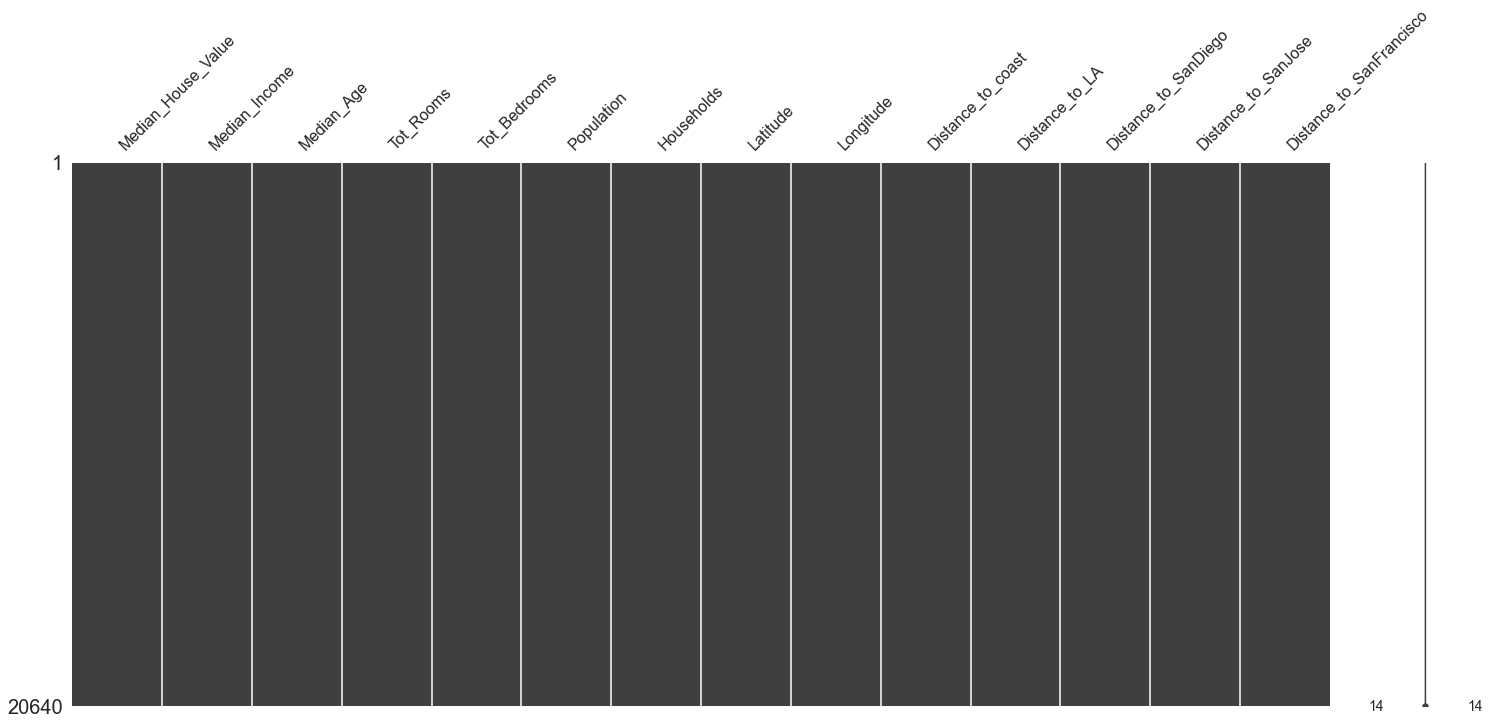

In [6]:
# Build a matrix of missing values
missingno.matrix(df, fontsize = 16)
plt.show()

In [7]:
# Melihat statistika deksriptif 
df.describe()

Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000      1.000000     32.540000   -124.350000   
25%      295.000000    787.000000    280.000000     33.930000   -121.800000   
50%      435.000000   1166.000000    409.000000     34.260000   -118.490000   
75%      647.000000   1725.000000    605.000000     37.710000   -118.010000   
max     6445.000000  35682.000000   6082.000000     41.950000   -114.310000   

       Distance_to_coast  Distance_to_LA  Distance_to_SanDiego  \
count       20640.000000    2.064000e+04          2.064000e+04   
mean        40509.264883    2.694220e+05          3.981649e+05   
std         49140.039160    2.477324e+05          2.894006e+05   
min           120.676447    4.205891e+02          4.849180e+02   
25%          9079.756762    3.211125e+04          1.594264e+05   
50%         20522.019101    1.736675e+05          2.147398e+05   
75%         49830.414479    5.271562e+05          7.057954e+05   
max        333804.686371    1.018260e+06          1.196919e+06   

       Distance_to_SanJose  Distance_to_SanFrancisco  
count         20640.000000              20640.000000  
mean         349187.551219             386688.422291  
std          217149.875026             250122.192316  
min             569.448118                456.141313  
25%          113119.928682             117395.477505  
50%          459758.877000             526546.661701  
75%          516946.490963             584552.007907  
max          836762.678210             903627.663298

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

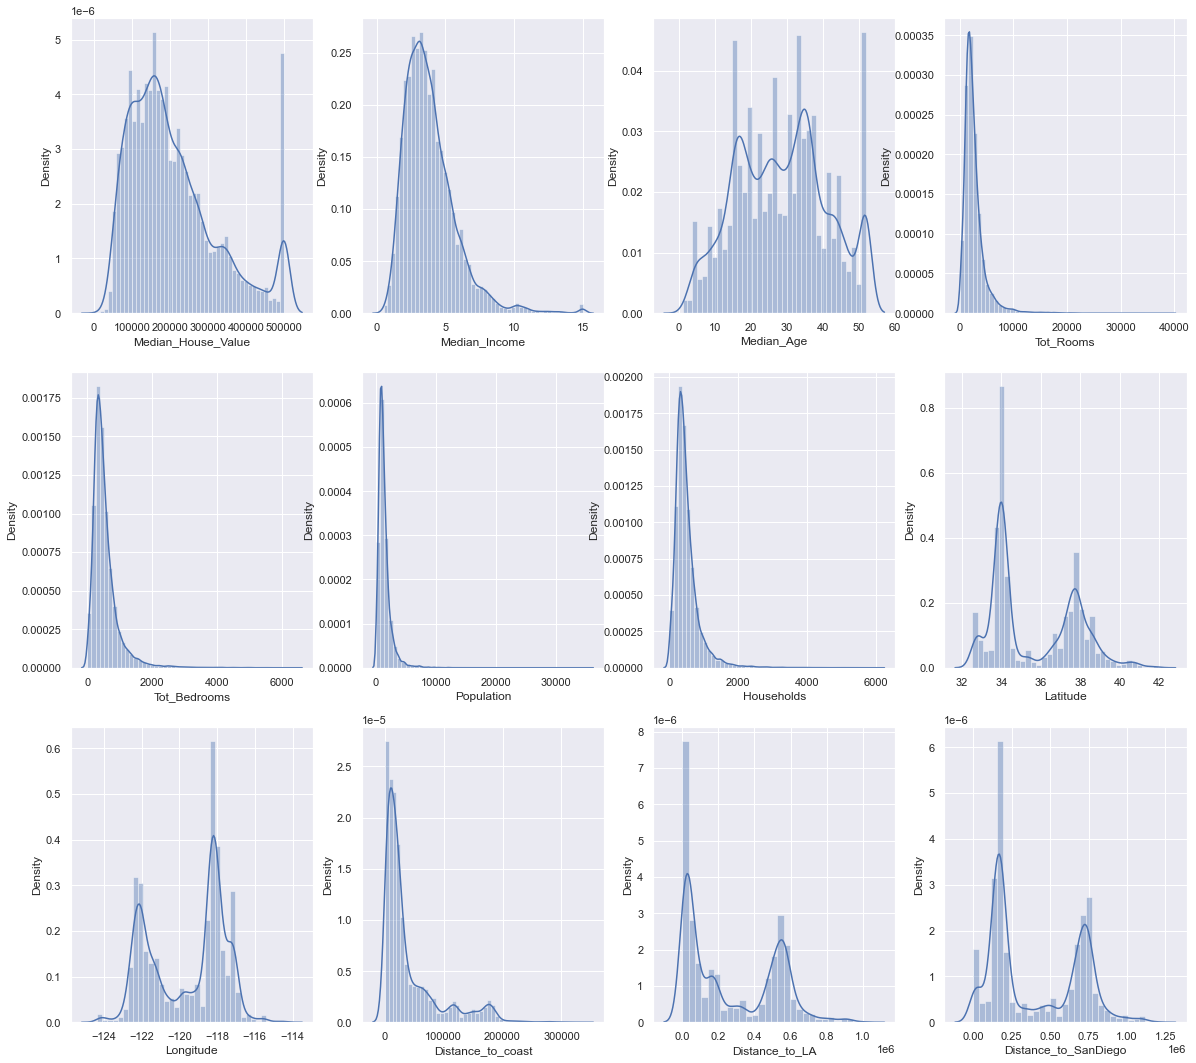

In [8]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

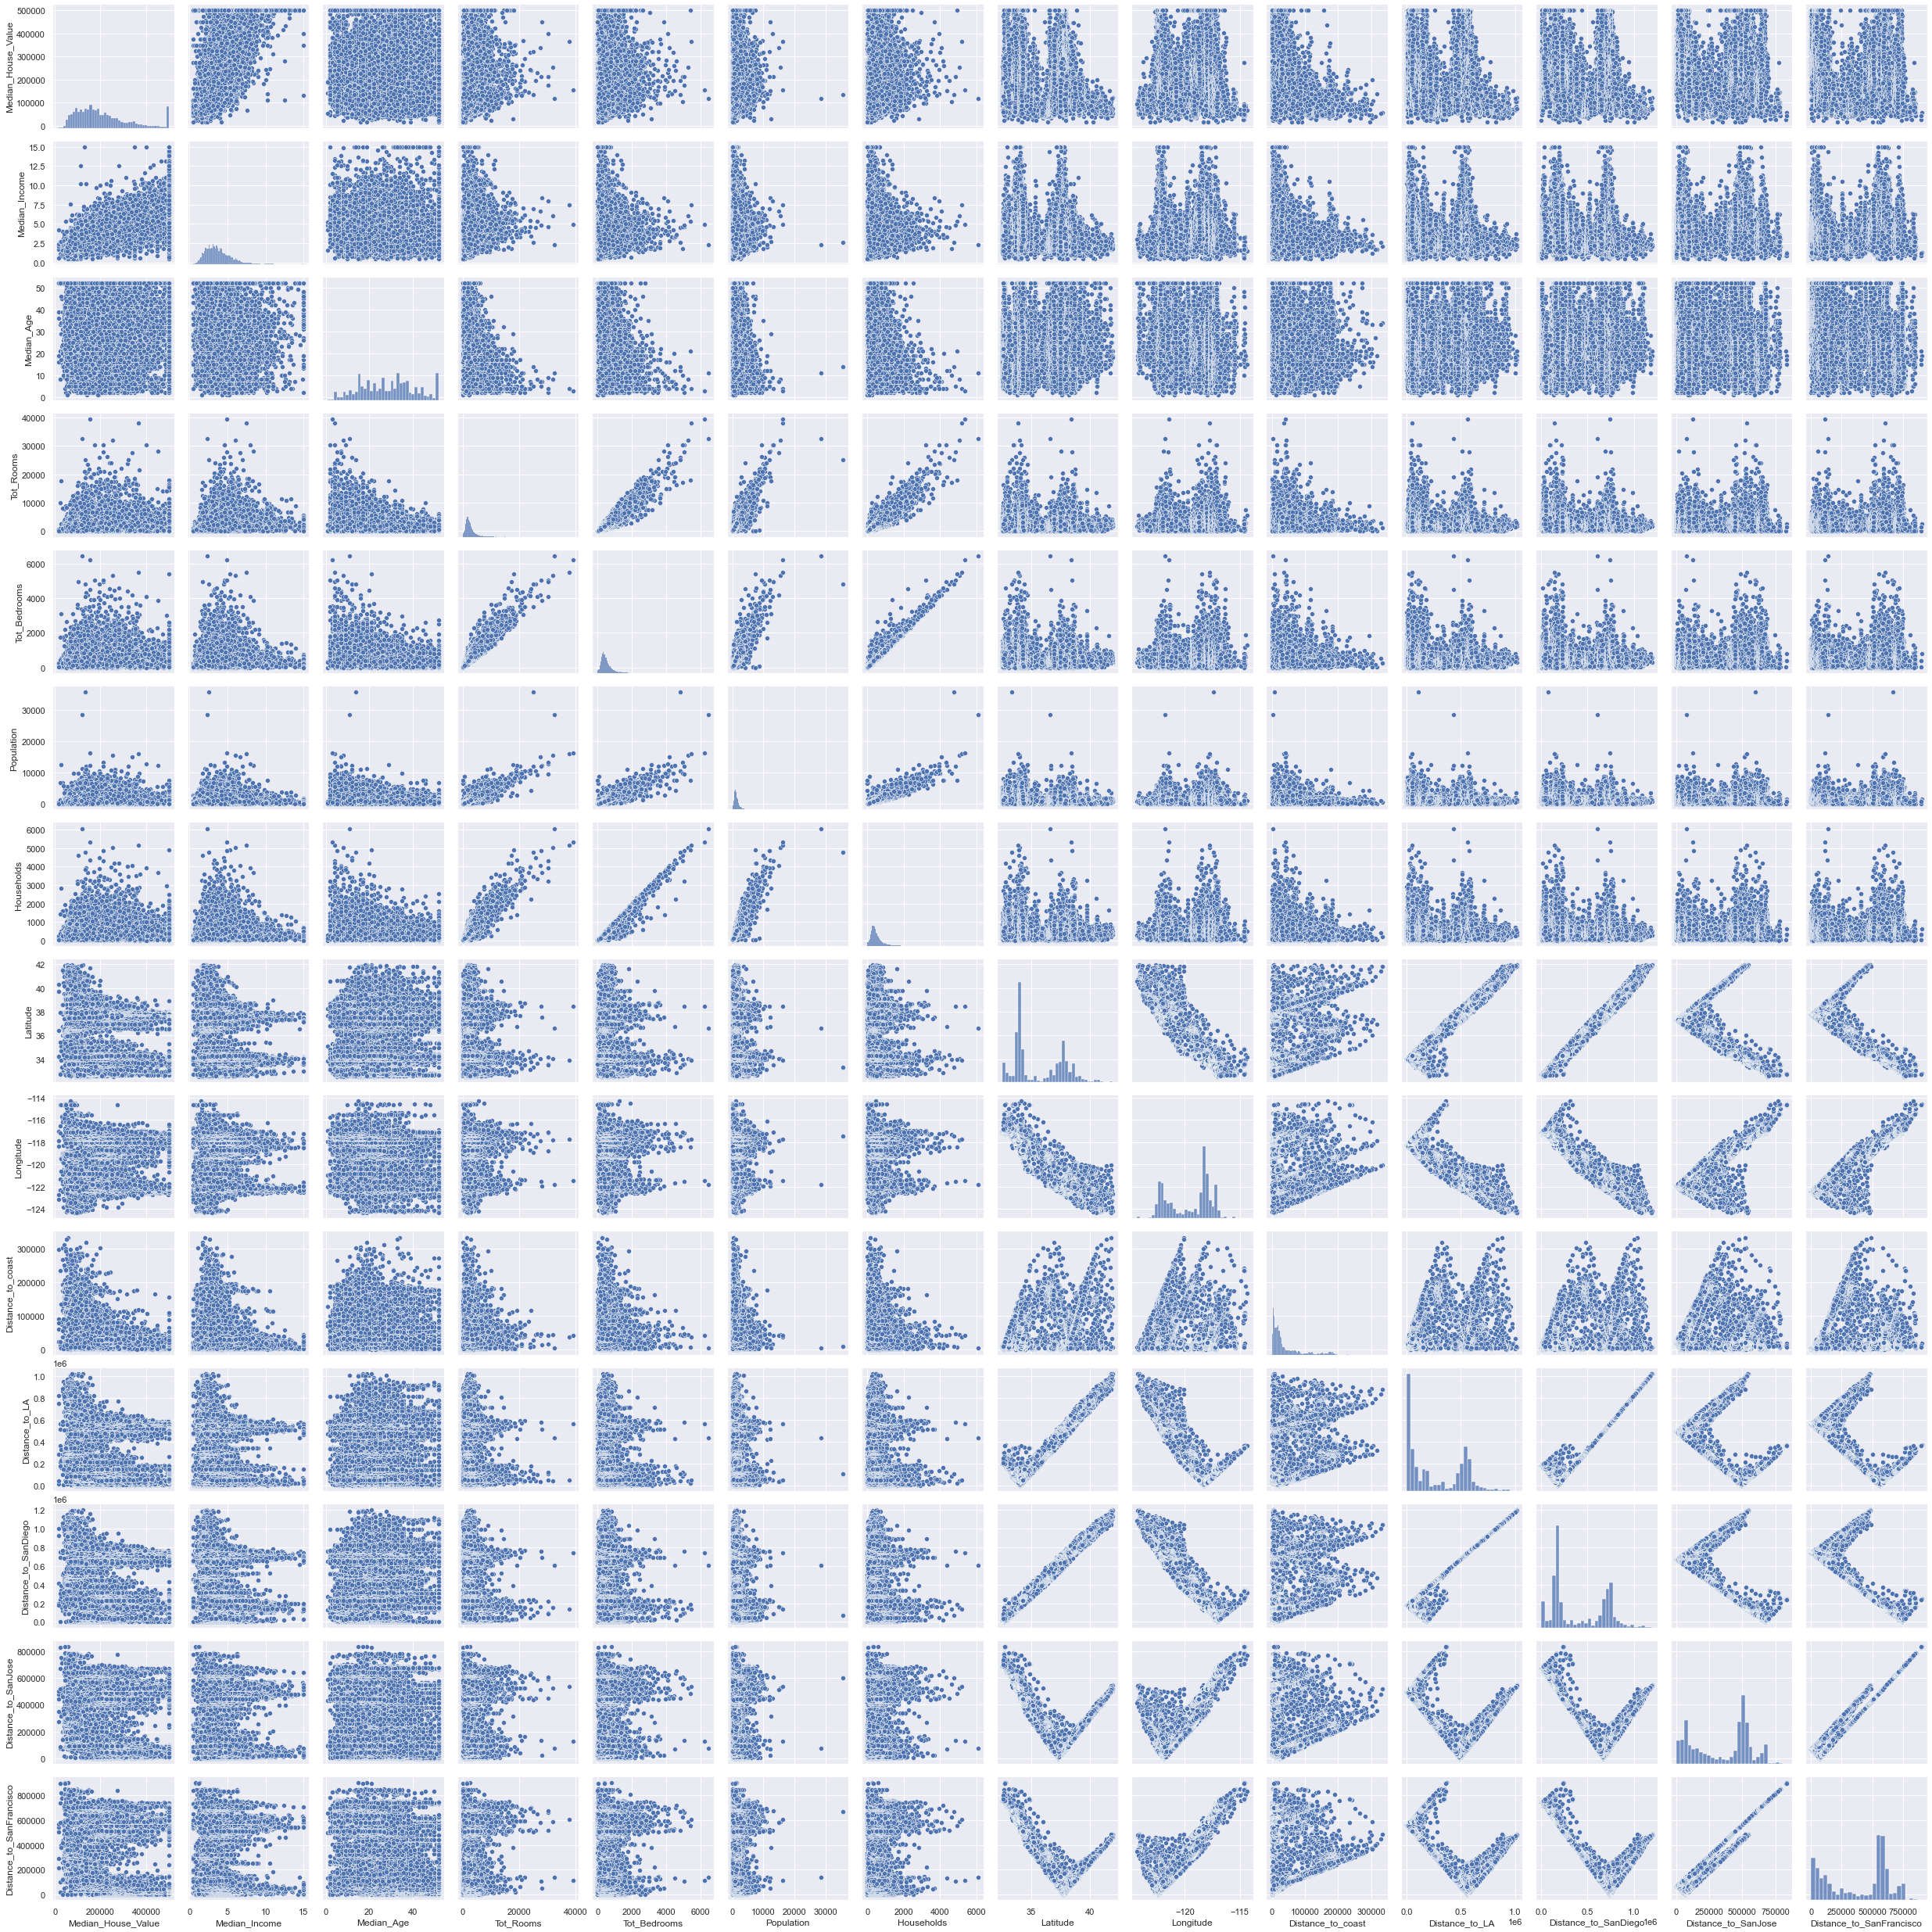

In [9]:
# Melihat persebaran data dari setiap kolom dataset
sns.pairplot(df)

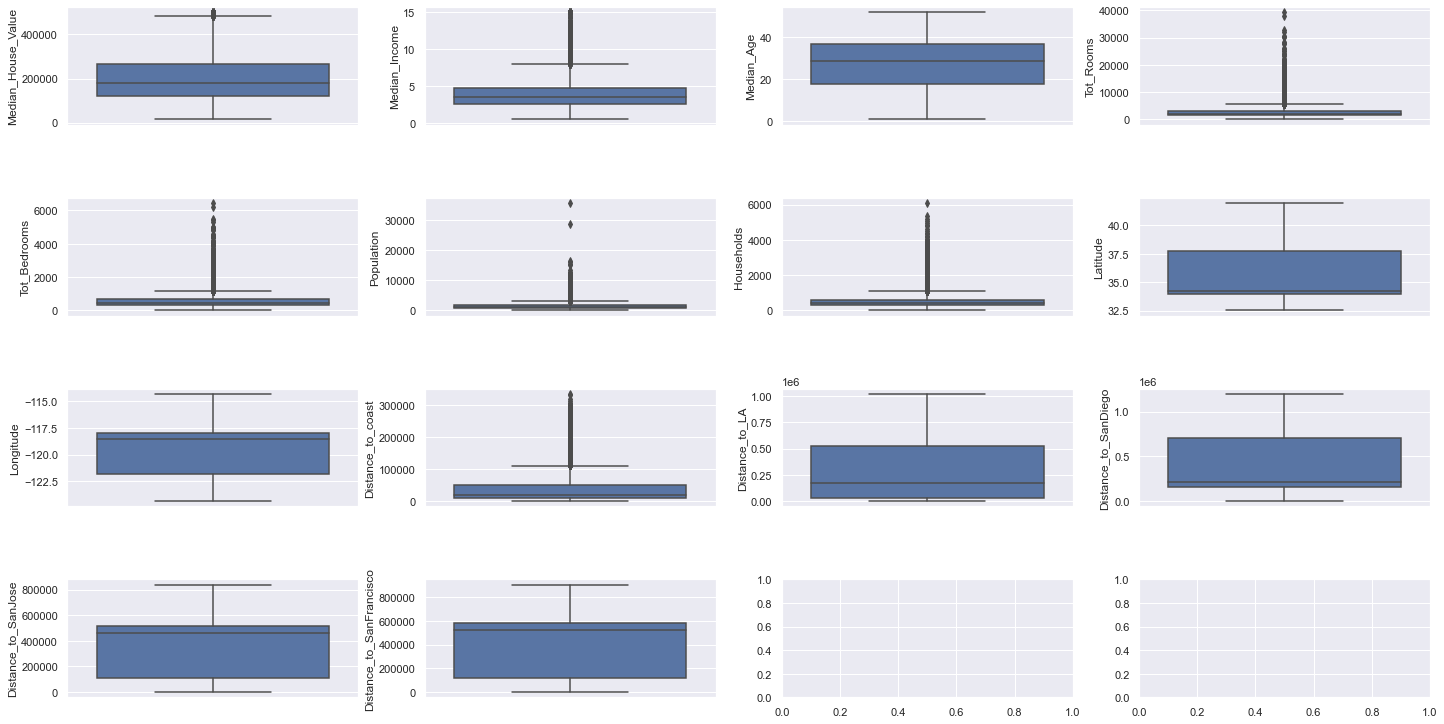

In [10]:
# Melihat apakah ada data outlier
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [11]:
# Handling Outlier dengan menggunakan IQR
import scipy.stats as st
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df_clean=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

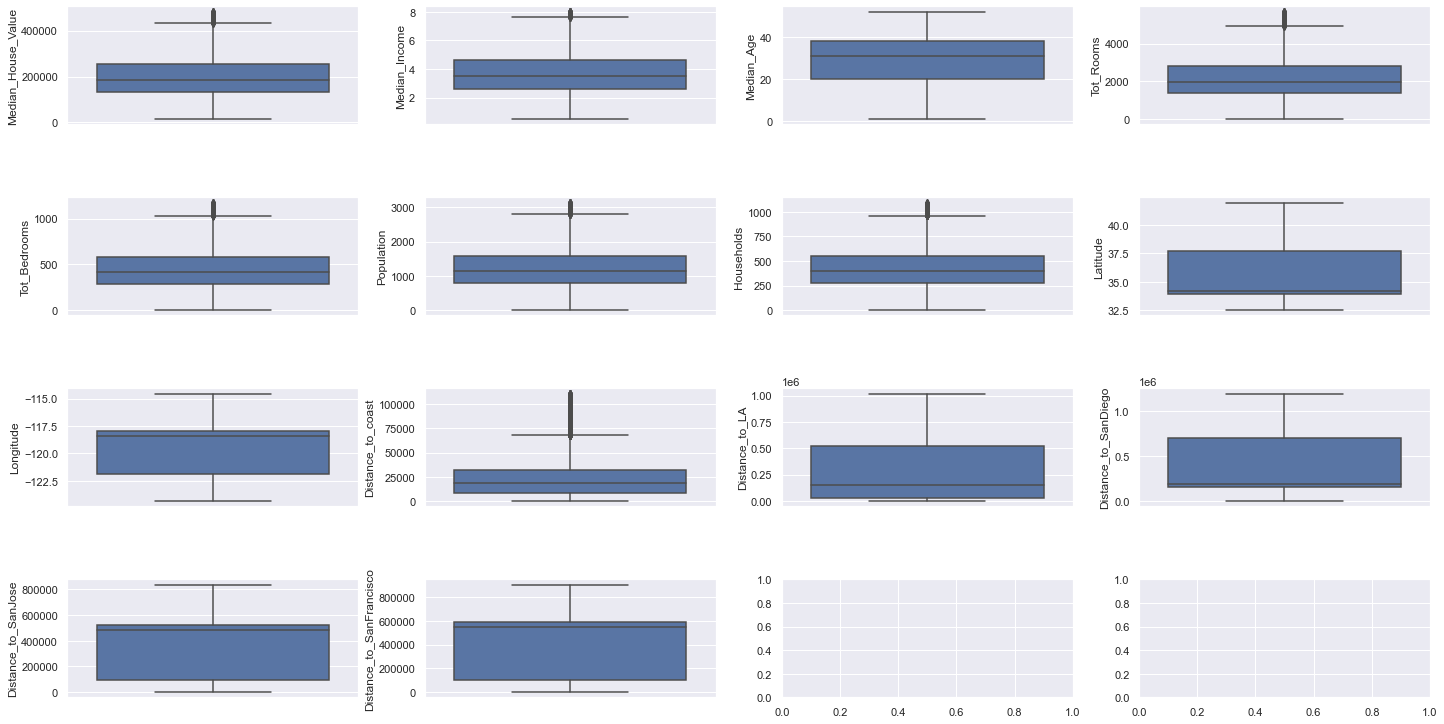

In [12]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df_clean.items():
    sns.boxplot(y=k, data=df_clean, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
df = df_clean

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

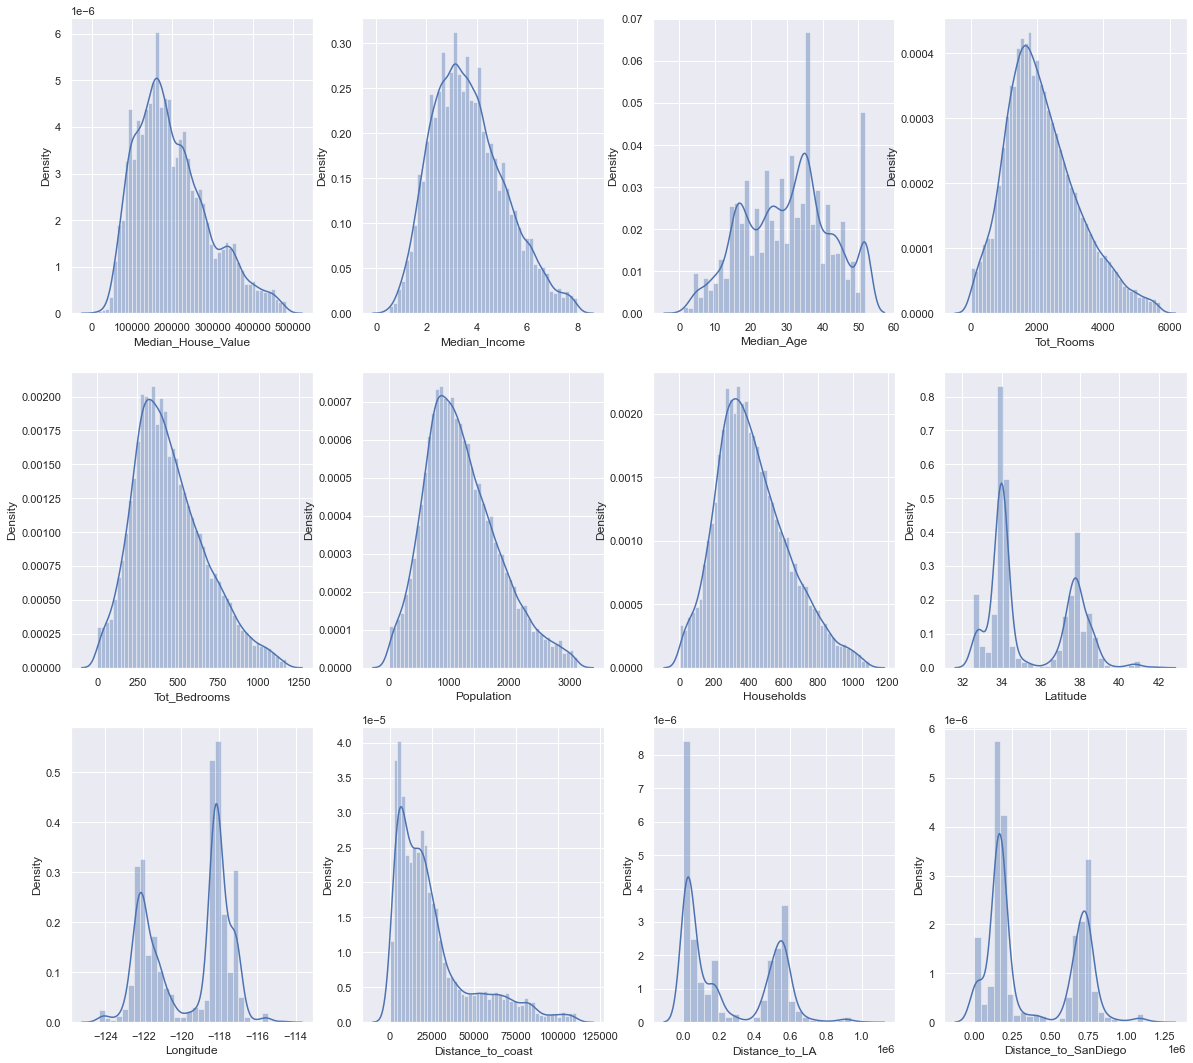

In [14]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

## Exploratory Data Analysis

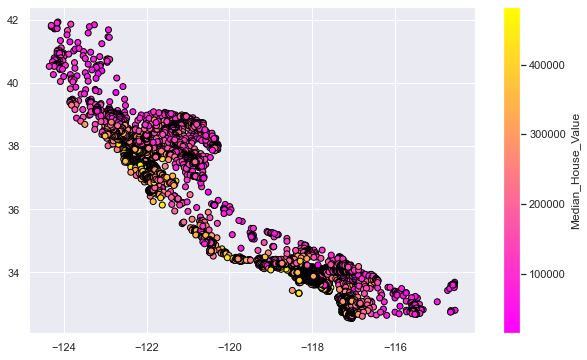

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(df.Longitude, df.Latitude, c=df.Median_House_Value, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)
cbar = plt.colorbar()
cbar.set_label('Median_House_Value')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


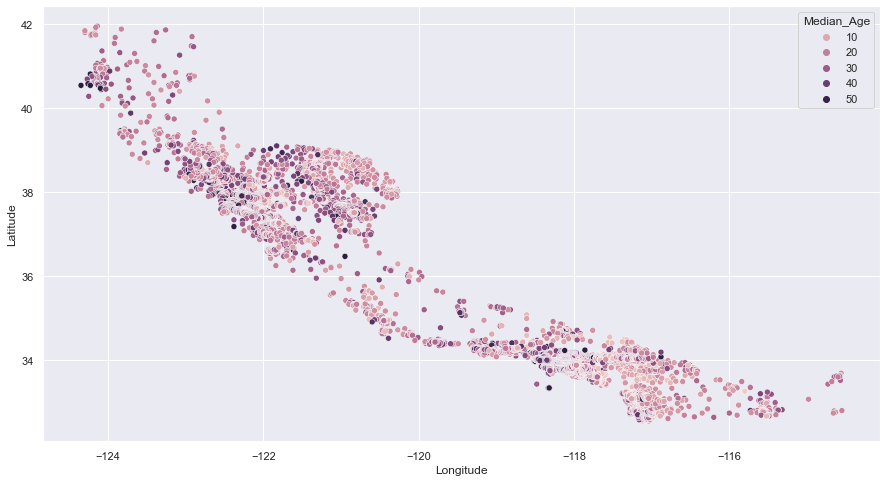

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Longitude, df.Latitude, hue=df.Median_Age)
plt.ioff()

In [17]:
import folium
from folium.plugins import HeatMap
m = folium.Map([37.88,-122.23], zoom_start =11)
HeatMap(df[['Latitude', 'Longitude']].dropna(), radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)

In [18]:
display(m)

In [19]:
corr_matrix = df.corr()
corr_matrix["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.609102
Tot_Rooms                   0.204225
Households                  0.106292
Tot_Bedrooms                0.085589
Median_Age                  0.059411
Distance_to_SanDiego       -0.022812
Population                 -0.041170
Latitude                   -0.058315
Longitude                  -0.073742
Distance_to_LA             -0.074722
Distance_to_SanFrancisco   -0.078653
Distance_to_SanJose        -0.096926
Distance_to_coast          -0.380210
Name: Median_House_Value, dtype: float64

## Multi Linear Regression

In [20]:
#Membuat X dan y
X_mlr_2 = df.drop(columns=['Median_House_Value', 'Latitude', 'Longitude'])
y_mlr_2 = df[['Median_House_Value']]

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_mlr_2)
x_scaled = scaler.transform(X_mlr_2)
X_mlr_2 = x_scaled

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
# Splitting Data Training Set dan Testing Set
X_train, X_test, y_train, y_test = train_test_split(X_mlr_2, y_mlr_2, test_size=0.2, random_state=42)

In [24]:
print(y_train.shape)
print(y_test.shape)

(12324, 1)
(3082, 1)


In [25]:
import statsmodels.api as sm
from sklearn import datasets
X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)

# Fit and make the predictions by the model
mlr = sm.OLS(y_train, X_train2).fit() # Ordinary least squares
predictions = mlr.predict(X_test2)

# Print out the statistics
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     1545.
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:04:17   Log-Likelihood:            -1.5290e+05
No. Observations:               12324   AIC:                         3.058e+05
Df Residuals:                   12312   BIC:                         3.059e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.012e+05    533.159    377.356      0.000       2e+05    2.02e+05
x1          5.632e+04    821.825     68.535      0.000    5.47e+04    5.79e+04
x2          8922.7189    628.363     14.200      0.000    7691.029    1.02e+04
x3         -9719.5261   1710.014     -5.684      0.000   -1.31e+04   -6367.630
x4          3.544e+04   3069.125     11.547      0.000    2.94e+04    4.15e+04
x5         -4.049e+04   1091.980    -37.077      0.000   -4.26e+04   -3.83e+04
x6          1.911e+04   3124.863      6.117      0.000     1.3e+04    2.52e+04
x7         -2.158e+04    619.634    -34.822      0.000   -2.28e+04   -2.04e+04
x8         -3.802e+04   1909.450    -19.914      0.000   -4.18e+04   -3.43e+04
x9          8546.8817   2949.674      2.898      0.004    2765.058    1.43e+04
x10        -1.543e+04   5366.666     -2.876      0.004    -2.6e+04   -4913.582
x11        -1.036e+04   6762.749     -1.532      0.125   -2.36e+04    2892.470
==============================================================================
Omnibus:                     1633.202   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3371.386
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       4.971   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train) # Training step

LinearRegression()

In [27]:
# Model prediction on train data
y_pred_lr = model_lr.predict(X_train)

In [28]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_lr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_lr))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr)))

R^2: 0.5798748099405032
Adjusted R^2: 0.5794994544263175
MAE: 44444.031583821445
MSE: 3499339555.407333
RMSE: 59155.215792078154


In [29]:
# Melihat hasil metric
y_pred_mlr_2 = model_lr.predict(X_test)
print('MSE :', metrics.mean_squared_error(y_test, y_pred_mlr_2))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr_2)))
print('MAE :', metrics.mean_absolute_error(y_test, y_pred_mlr_2))
print('R^2 :', model_lr.score(X_test,y_test))
acc_mlr2 = model_lr.score(X_test, y_test)

MSE : 3532348854.269507
RMSE : 59433.56673016947
MAE : 44422.17686768628
R^2 : 0.5619423216482673


In [30]:
compare_mlr = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_mlr_2, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Media House Value']-compare_mlr['Prediction']
compare_mlr.head()

Median_House_Value     Prediction
0            355200.0  216015.720894
1            442000.0  311322.966098
2            137200.0  164955.229204
3             90200.0  137507.850560
4            177600.0  243421.071667

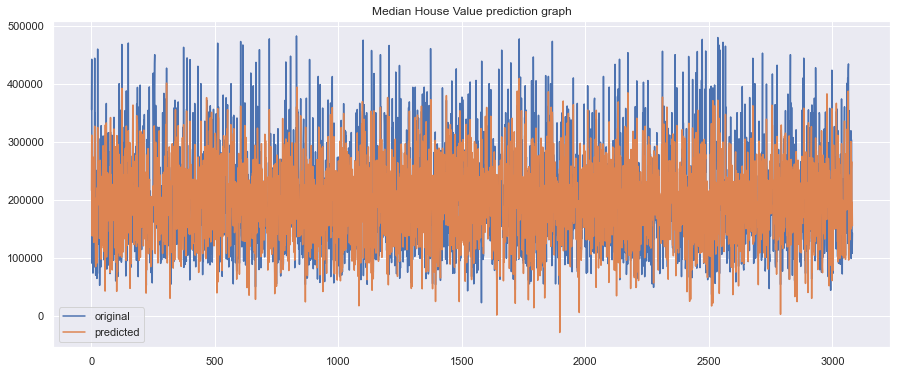

In [31]:
# Melihat hasil perbandingan actual dengan prediksi
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_mlr_2, label="predicted")
plt.title("Median House Value prediction graph")
plt.legend()
plt.show()

## Random Forest Regressor

In [32]:
# Membuat X dan y
X_rf = df.drop(columns=['Median_House_Value', 'Longitude', 'Latitude'])
y_rf = df[['Median_House_Value']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [34]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

<ipython-input-34-42db2652d05a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


RandomForestRegressor()

In [35]:
# Model prediction on train data
y_pred_rfg = reg.predict(X_train)

In [36]:
# Model Evaluation Training
print('R^2:',metrics.r2_score(y_train, y_pred_rfg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_rfg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_rfg)))

R^2: 0.9643234241517191
Adjusted R^2: 0.9642915493682289
MAE: 11622.629096072702
MSE: 297160122.7950629
RMSE: 17238.332947099698


In [37]:
compare_rfg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_rfg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Median House Value']-compare_mlr['Prediction']
compare_rfg.head(20)

Median_House_Value  Prediction
0             355200.0    179638.0
1             442000.0    288793.0
2             137200.0    325585.0
3              90200.0    161626.0
4             177600.0    221404.0
5             250800.0    213599.0
6              73600.0    264660.0
7             220600.0    305827.0
8             208300.0    166756.0
9             149300.0    161294.0
10            119800.0    248341.0
11            163600.0    155750.0
12            240700.0    260798.0
13            443900.0    122135.0
14             84000.0    155982.0
15            350000.0    189996.0
16            119200.0    365109.0
17             69900.0    130239.0
18            247600.0    285277.0
19            143800.0     95674.0

In [38]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_rfg['Median_House_Value']-compare_rfg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9403631800782102
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0008264699207490266
Residuals are not normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


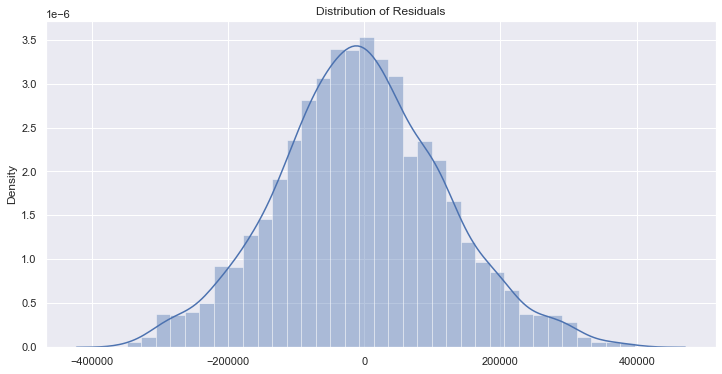


Assumption not satisfied


In [39]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_rfg['Median_House_Value']-compare_rfg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_rfg['Median_House_Value']-compare_rfg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

In [40]:
# Prediksi tes data dengan model
y_test_pred_rfg = reg.predict(X_test)

In [41]:
# Model Evaluation Testing
acc_rf = metrics.r2_score(y_test, y_test_pred_rfg)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_rfg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_rfg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg)))
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfg))

R^2: 0.7407042043292034
Adjusted R^2: 0.7397751314456924
MAE: 30907.06023685918
MSE: 2090873535.6516461
RMSE: 45726.07063428527


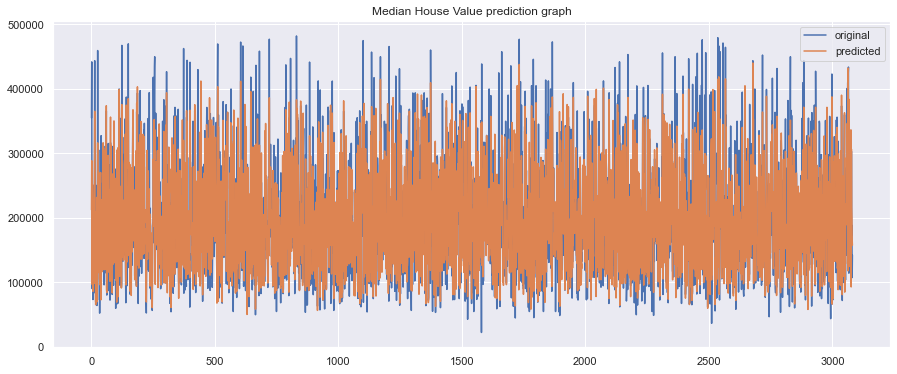

In [42]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_rfg, label="predicted")
plt.title("Median House Value prediction graph")
plt.legend()
plt.show()

## XGBOOST Regressor

In [43]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xbreg = XGBRegressor()

# Train the model using the training sets 
xbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
# Model prediction on train data
y_pred_xg = xbreg.predict(X_train)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [45]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xg))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xg))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xg))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xg)))

R^2: 0.9257104752580803
Adjusted R^2: 0.9256441022259034
MAE: 18013.18437490491
MSE: 618778113.3642476
RMSE: 24875.25102113037


In [46]:
compare_xg = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xg, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Median_House_Value']-compare_mlr['Prediction']
compare_xg.head(20)

Median_House_Value     Prediction
0             355200.0  183023.359375
1             442000.0  283403.812500
2             137200.0  331564.187500
3              90200.0  148809.156250
4             177600.0  220902.218750
5             250800.0  226411.109375
6              73600.0  307833.875000
7             220600.0  311297.218750
8             208300.0  162695.218750
9             149300.0  150185.578125
10            119800.0  208574.406250
11            163600.0  158297.031250
12            240700.0  245194.218750
13            443900.0  135309.296875
14             84000.0  161829.828125
15            350000.0  191567.031250
16            119200.0  341780.656250
17             69900.0  123312.070312
18            247600.0  282967.468750
19            143800.0   90229.742188

In [48]:
#Cek autokorelasi
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(compare_xg['Median_House_Value']-compare_xg['Prediction'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9458252420800075
Little to no autocorrelation 

Assumption satisfied


Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0013884663357061333
Residuals are not normally distributed


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


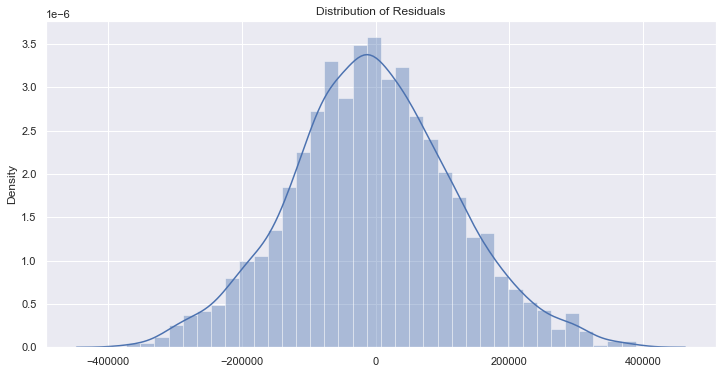


Assumption not satisfied


In [49]:
# Cek normalitas
from statsmodels.stats.diagnostic import normal_ad

print('Using the Anderson-Darling test for normal distribution')

# Performing the test on the residuals
p_value = normal_ad(compare_xg['Median_House_Value']-compare_xg['Prediction'])[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(compare_xg['Median_House_Value']-compare_xg['Prediction'])
plt.show()

print()
if p_value > 0.05:
    print('Assumption satisfied')
else:
    print('Assumption not satisfied')

In [50]:
# Prediksi tes data dengan model
y_test_pred_xg = xbreg.predict(X_test)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [51]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_xg)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xg))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg)))
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xg))

R^2: 0.7528071180980158
Adjusted R^2: 0.7519214107035788
MAE: 30455.335564872647
MSE: 1993279735.343321
RMSE: 44646.16148498459


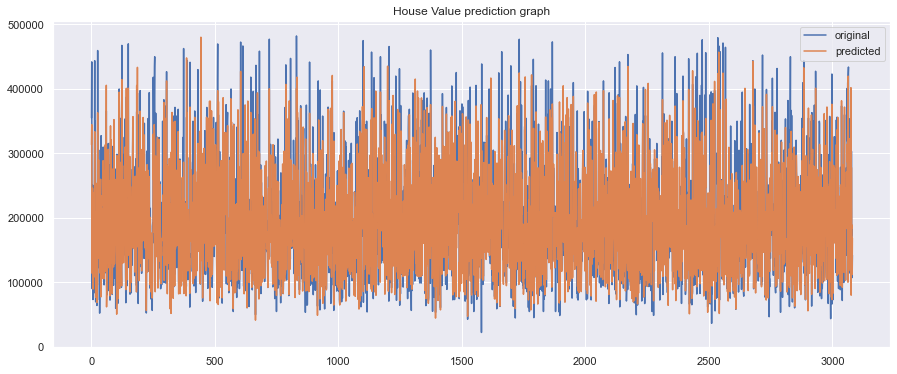

In [52]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xg, label="predicted")
plt.title("House Value prediction graph")
plt.legend()
plt.show()

## Hyperparameter Tuning

In [53]:
from sklearn.model_selection import cross_val_score, GridSearchCV
model = XGBRegressor(n_jobs=4)

parameters = {
    'n_estimators': [50, 100, 500],
    'max_depth': [2, 4, 6, 8, 10],
    'gamma': [0.001, 0.01],
    'learning_rate': [0.01, 0.1],
    'booster': ['gbtree']
}

grid_obj = GridSearchCV(
    estimator=xbreg,
    param_grid=parameters
)

grid_obj.fit(X_train, y_train)

best_model = grid_obj.best_estimator_
print(best_model)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [54]:
xgc = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
# Train the model using the training sets 
xgc.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# Model prediction on train data
y_pred_xgc = xgc.predict(X_train)

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [57]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred_xgc))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_xgc))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_xgc))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_xgc))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_xgc)))

R^2: 0.9536791559935711
Adjusted R^2: 0.9536377712239097
MAE: 14135.511790859046
MSE: 385819192.7234691
RMSE: 19642.280741387163


In [58]:
compare_xgc = y_test.reset_index(drop = True).join(pd.DataFrame(y_pred_xgc, columns=['Prediction']))
#compare_mlr['Residuals'] = compare_mlr['Median_House_Value']-compare_mlr['Prediction']
compare_xgc.head(20)

Median_House_Value     Prediction
0             355200.0  176794.859375
1             442000.0  283956.218750
2             137200.0  335805.906250
3              90200.0  164682.078125
4             177600.0  227778.296875
5             250800.0  215328.218750
6              73600.0  299642.843750
7             220600.0  307503.906250
8             208300.0  155042.468750
9             149300.0  148912.890625
10            119800.0  235355.078125
11            163600.0  151719.468750
12            240700.0  253379.781250
13            443900.0  136597.718750
14             84000.0  160378.765625
15            350000.0  191641.390625
16            119200.0  361413.750000
17             69900.0  139640.062500
18            247600.0  283756.531250
19            143800.0   96347.210938

In [59]:
# Prediksi tes data dengan model
y_test_pred_xgc = xgc.predict(X_test)
# Model Evaluation
acc_xgc = metrics.r2_score(y_test, y_test_pred_xgc)
print('R^2:', acc_xgc)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_xgc))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_xgc))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_xgc))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgc)))
rmse_xgc = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_xgc))

R^2: 0.7649012363988257
Adjusted R^2: 0.7640588629787564
MAE: 29496.35586545871
MSE: 1895756858.712076
RMSE: 43540.290062332795


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


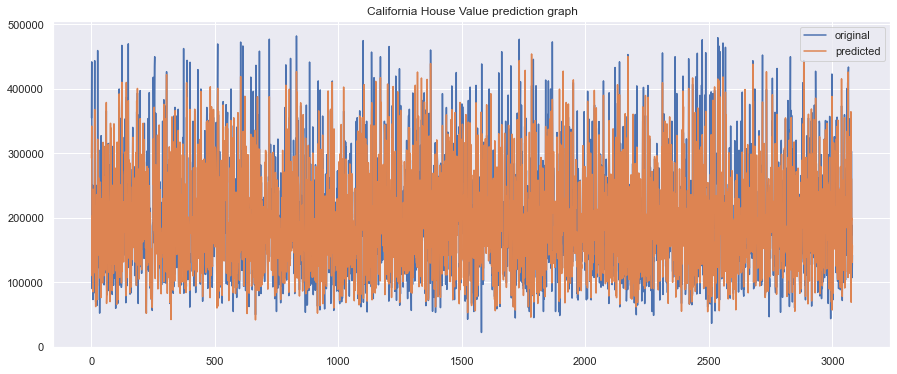

In [60]:
plt.figure(figsize=(15,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test_pred_xgc, label="predicted")
plt.title("California House Value prediction graph")
plt.legend()
plt.show()